In [1]:
!unzip '/content/drive/MyDrive/BirdSpecies.zip'

Archive:  /content/drive/MyDrive/BirdSpecies.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: tes

In [2]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255)) 

In [4]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
     

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [5]:
y=train.class_indices
y

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [6]:
# CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential    

In [7]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(train,batch_size=16,validation_data=test,epochs=40)

Epoch 1/40
19/19 [==============================] - 111s 6s/step - loss: 3.7968 - accuracy: 0.0533 - val_loss: 2.7385 - val_accuracy: 0.1146
Epoch 2/40
19/19 [==============================] - 128s 7s/step - loss: 2.5789 - accuracy: 0.2067 - val_loss: 2.7725 - val_accuracy: 0.1592
Epoch 3/40
19/19 [==============================] - 126s 7s/step - loss: 2.3124 - accuracy: 0.3200 - val_loss: 2.7851 - val_accuracy: 0.1720
Epoch 4/40
19/19 [==============================] - 128s 7s/step - loss: 2.1588 - accuracy: 0.3267 - val_loss: 2.6799 - val_accuracy: 0.1911
Epoch 5/40
19/19 [==============================] - 133s 7s/step - loss: 1.9946 - accuracy: 0.3333 - val_loss: 2.6736 - val_accuracy: 0.2102
Epoch 6/40
19/19 [==============================] - 128s 7s/step - loss: 1.8944 - accuracy: 0.3867 - val_loss: 2.9363 - val_accuracy: 0.1847
Epoch 7/40
19/19 [==============================] - 129s 7s/step - loss: 1.8161 - accuracy: 0.3933 - val_loss: 2.6255 - val_accuracy: 0.2420
Epoch 8/40
19

In [11]:
model.save('birdspecies.h5')

In [12]:
# Testing
import numpy as np
from tensorflow.keras.preprocessing import image  

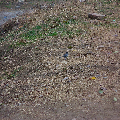

In [13]:
img1 = image.load_img('/content/100_5045.JPG',target_size=(120,120))
img1


In [14]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 199ms/step
5
gretit


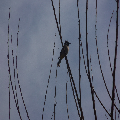

In [15]:
img2 = image.load_img('/content/100_5112.JPG',target_size=(120,120))
img2



In [16]:
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])


1/1 [==============================] - 0s 26ms/step
7
himbul


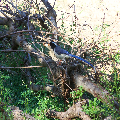

In [17]:
img3 = image.load_img('/content/100_5754.JPG',target_size=(120,120))
img3


In [18]:
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 25ms/step
14
rebimg


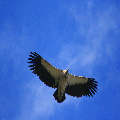

In [19]:
img4 = image.load_img('/content/12152037683_13e1556c41_o.jpg',target_size=(120,120))
img4



In [20]:
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 32ms/step
8
himgri


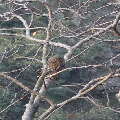

In [21]:
img5 = image.load_img('/content/DSC01336.jpg',target_size=(120,120))
img5


In [22]:
img5 = image.img_to_array(img5)
img5 = np.expand_dims(img5,axis=0)
pred = np.argmax(model.predict(img5))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 25ms/step
11
jglowl


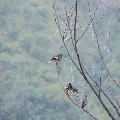

In [23]:
img6 = image.load_img('/content/DSCN5787.jpg',target_size=(120,120))
img6

In [24]:
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
pred = np.argmax(model.predict(img6))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 25ms/step
4
cmnmyn


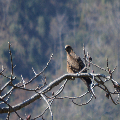

In [25]:
img7 = image.load_img('/content/DSC_4571.jpg',target_size=(120,120))
img7


In [26]:
img7 = image.img_to_array(img7)
img7 = np.expand_dims(img7,axis=0)
pred = np.argmax(model.predict(img7))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 26ms/step
1
bonegl


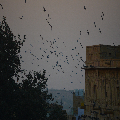

In [27]:
img8 = image.load_img('/content/DSC_6351.jpg',target_size=(120,120))
img8


In [28]:
img8 = image.img_to_array(img8)
img8 = np.expand_dims(img8,axis=0)
pred = np.argmax(model.predict(img5))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 29ms/step
11
jglowl


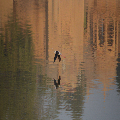

In [29]:
img9 = image.load_img('/content/DSC_6384-2.jpg',target_size=(120,120))
img9

In [30]:
img9 = image.img_to_array(img9)
img9 = np.expand_dims(img9,axis=0)
pred = np.argmax(model.predict(img5))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 28ms/step
11
jglowl


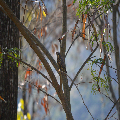

In [31]:
img10 = image.load_img('/content/_D32_10307.jpg',target_size=(120,120))
img10

In [32]:
img10 = image.img_to_array(img10)
img10 = np.expand_dims(img10,axis=0)
pred = np.argmax(model.predict(img5))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 26ms/step
11
jglowl
